In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import mlgrad.regr as regr
import mlgrad.funcs as funcs
import mlgrad.loss as loss
import mlgrad.models as models

In [3]:
def series(n):
    x1 = 1.
    x2 = 1.
    yield x1
    yield x2
    i = 3
    while i <= n:
        x1, x2 = 0.7*x1 + 0.4*x2, x1
        yield x1
        i += 1
    

In [4]:
X = np.fromiter(series(30), "d", 30)
print(X)

[1.000 1.000 1.100 1.170 1.259 1.349 1.448 1.553 1.667 1.788 1.918 2.058
 2.208 2.369 2.541 2.726 2.925 3.138 3.367 3.612 3.875 4.157 4.460 4.785
 5.133 5.507 5.908 6.339 6.801 7.296]


In [5]:
def make_table(X, m):
    N = len(X)
    XX = np.zeros((N-m,m), "d")
    YY = np.zeros(N-m, "d")
    for i in range(0, N-m):
        u = X[i:i+m]
        # u = u[::-1]
        XX[i,:] = u
        YY[i] = X[i+m]
    return XX, YY
    

In [6]:
XX, YY = make_table(X, 2)
for x,y in zip(XX, YY):
    print(x, y)

print(len(XX))

[1. 1.] 1.1
[1.0 1.1] 1.17
[1.10 1.17] 1.259
[1.170 1.259] 1.3493
[1.259 1.349] 1.4481099999999998
[1.349 1.448] 1.5533969999999997
[1.448 1.553] 1.6666218999999995
[1.553 1.667] 1.7879941299999995
[1.667 1.788] 1.9182446509999993
[1.788 1.918] 2.0579689076999994
[1.918 2.058] 2.207876095789999
[2.058 2.208] 2.3687008301329993
[2.208 2.369] 2.541241019409099
[2.369 2.541] 2.726349045639569
[2.541 2.726] 2.924940739711338
[2.726 2.925] 3.137998136053764
[2.925 3.138] 3.3665749911221696
[3.138 3.367] 3.611801748207024
[3.367 3.612] 3.874891220193785
[3.612 3.875] 4.157144553418458
[3.875 4.157] 4.459957675470434
[4.157 4.460] 4.784828194196687
[4.460 4.785] 5.133362806125855
[4.785 5.133] 5.507285241966773
[5.133 5.507] 5.908444791827083
[5.507 5.908] 6.338825451065668
[5.908 6.339] 6.800555732476801
[6.339 6.801] 7.295919193160028
28


In [7]:
mod = models.LinearModel(2)
lossfunc = loss.ErrorLoss(funcs.Square())
# alg = regr.regression(XX, YY, mod, lossfunc, weights=1./(YY*YY), h=0.001, tol=1.0e-10, n_iter=10000)
alg = regr.regression(XX, YY, mod, lossfunc, h=0.001, tol=1.0e-15, n_iter=50000)
print(np.asarray(mod.param), alg.K)

[-2.834e-04  4.504e-01  6.531e-01] 31372


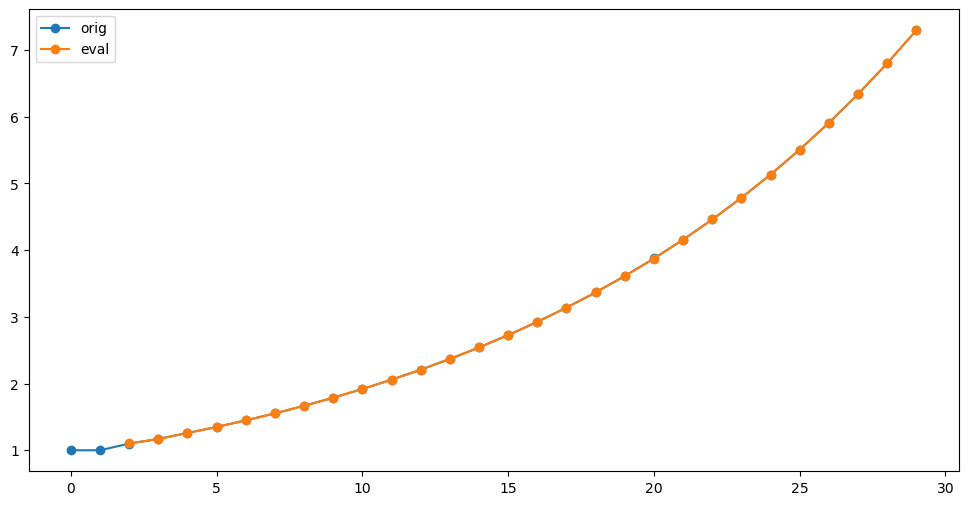

In [8]:
plt.figure(figsize=(12,6))
plt.plot(range(30), X, marker='o', label="orig")
plt.plot(range(2,30), mod.evaluate(XX), marker='o', label='eval')
plt.legend()
plt.show()

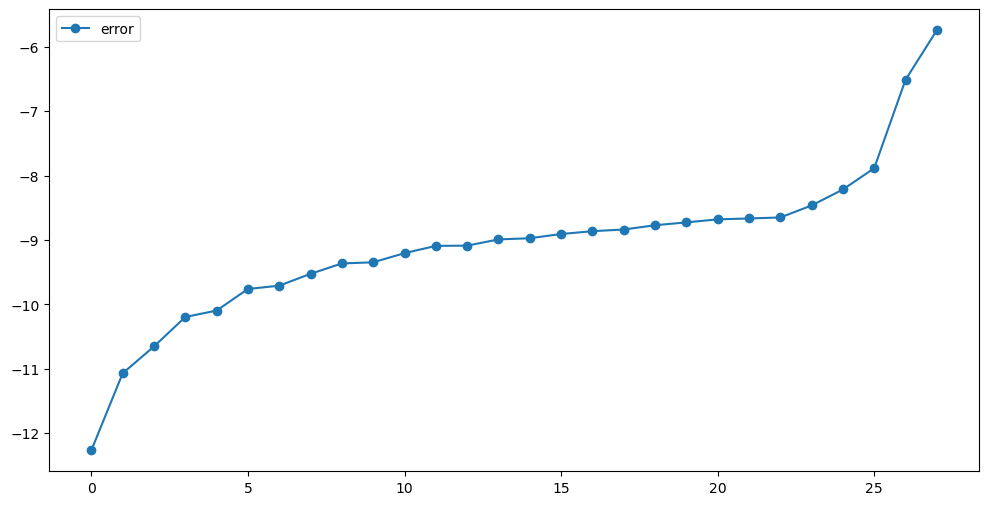

In [9]:
plt.figure(figsize=(12,6))
plt.plot(sorted(np.log(abs(YY - mod.evaluate(XX)))), marker='o', label='error')
plt.legend()
plt.show()

In [10]:
Z = np.ones(len(XX[:,0]), "d")
XXT = np.c_[(Z, XX[:,0], XX[:,1])]
print(XXT.shape)

(28, 3)


In [11]:
C = XXT.T @ XXT

In [12]:
np.linalg.eig(C)

EigResult(eigenvalues=array([6.677e+02, 6.301e+00, 2.749e-03]), eigenvectors=array([[ 0.181,  0.983,  0.004],
       [ 0.671, -0.120, -0.732],
       [ 0.719, -0.135,  0.681]]))